# Question no. 2

# On which features performance of Government depend before WWII, after WWII and today?So we can analyse the factors that affect Govt Performance..

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [32]:
#Data Frame and Missing Value
df1 = pd.read_csv('dataset.csv', encoding='latin-1')
df = df1.fillna(0)

In [33]:
#Before WW2
usa = df[df['iso'] == "USA"]
usa_b = usa[usa.year.isin(['1900','1901','1902','1903','1904','1905','1906','1907','1908','1909','1910',
                           '1911','1912','1913','1914','1915','1916','1917','1918','1919','1920','1921',
                           '1922','1923','1924','1925','1926','1927','1928','1929','1930','1931','1932',
                           '1933','1934'])]

In [34]:
#After WW2
usa_af = usa[usa.year.isin(['1945','1946','1947','1948','1949','1950','1951','1952','1953','1954','1955',
                           '1956','1957','1958','1959','1960','1961','1962','1963','1964','1965','1966',
                           '1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977',
                           '1978','1979'])]

In [35]:
#Now
usa_now = usa[usa.year.isin(['1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990',
                           '1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001',
                           '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012',
                           '2013','2014'])]

# Before WWII

In [36]:
#Data Splitting Target Feature and Predictors
X = usa_b[['partycount', 'protests', 'frac', 'rgdp', 'govvote','oppvote','turnover']]
y = usa_b.pk_norm

x_Train, x_Test, y_Train, y_Test = train_test_split(X,y,test_size=0.3)
y.mean()

0.17142857142857143

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2019-07-30 21:51:59] Features: 7/7 -- score: 0.9

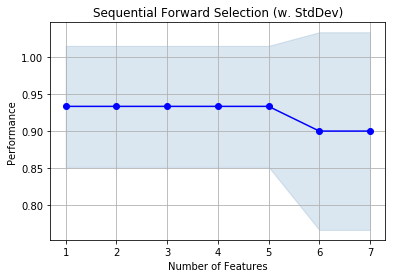

Selected features: (0, 1, 2, 3, 4, 5, 6)


{1: {'feature_idx': (0,),
  'cv_scores': array([0.83333333, 0.83333333, 1.        , 1.        , 1.        ]),
  'avg_score': 0.9333333333333333,
  'feature_names': ('partycount',)},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.83333333, 0.83333333, 1.        , 1.        , 1.        ]),
  'avg_score': 0.9333333333333333,
  'feature_names': ('partycount', 'protests')},
 3: {'feature_idx': (0, 1, 5),
  'cv_scores': array([0.83333333, 0.83333333, 1.        , 1.        , 1.        ]),
  'avg_score': 0.9333333333333333,
  'feature_names': ('partycount', 'protests', 'oppvote')},
 4: {'feature_idx': (0, 1, 4, 5),
  'cv_scores': array([0.83333333, 0.83333333, 1.        , 1.        , 1.        ]),
  'avg_score': 0.9333333333333333,
  'feature_names': ('partycount', 'protests', 'govvote', 'oppvote')},
 5: {'feature_idx': (0, 1, 4, 5, 6),
  'cv_scores': array([0.83333333, 0.83333333, 1.        , 1.        , 1.        ]),
  'avg_score': 0.9333333333333333,
  'feature_names': ('partycount',
 

In [44]:
clf_gini = DecisionTreeClassifier(criterion="entropy", max_depth=7)
sfs = SFS(clf_gini,
           k_features=7,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

sfs = sfs.fit(x_Train, y_Train)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')


plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()
print('Selected features:', sfs.k_feature_idx_)
#clf_gini.fit(X_train, y_train)
sfs.k_feature_names_
sfs.subsets_

# After WWII

In [38]:
X1 = usa_af[['partycount', 'protests', 'frac', 'rgdp', 'govvote','oppvote','turnover']]
y1 = usa_af.pk_norm

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X1,y1,test_size=0.3)
y1.mean()

0.17142857142857143

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:

C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2019-07-30 20:39:50] Features: 6/7 -- score: 0.7366666666666667[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, whi

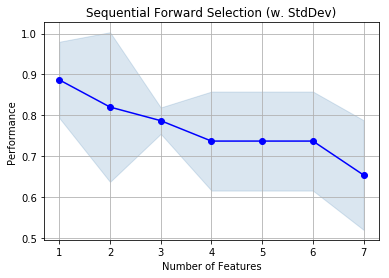

Selected features: (0, 1, 2, 3, 4, 5, 6)


{1: {'feature_idx': (0,),
  'cv_scores': array([0.83333333, 0.8       , 0.8       , 1.        , 1.        ]),
  'avg_score': 0.8866666666666667,
  'feature_names': ('partycount',)},
 2: {'feature_idx': (0, 6),
  'cv_scores': array([0.5, 0.8, 0.8, 1. , 1. ]),
  'avg_score': 0.82,
  'feature_names': ('partycount', 'turnover')},
 3: {'feature_idx': (0, 5, 6),
  'cv_scores': array([0.83333333, 0.8       , 0.8       , 0.75      , 0.75      ]),
  'avg_score': 0.7866666666666667,
  'feature_names': ('partycount', 'oppvote', 'turnover')},
 4: {'feature_idx': (0, 1, 5, 6),
  'cv_scores': array([0.83333333, 0.8       , 0.8       , 0.5       , 0.75      ]),
  'avg_score': 0.7366666666666667,
  'feature_names': ('partycount', 'protests', 'oppvote', 'turnover')},
 5: {'feature_idx': (0, 1, 4, 5, 6),
  'cv_scores': array([0.83333333, 0.8       , 0.8       , 0.5       , 0.75      ]),
  'avg_score': 0.7366666666666667,
  'feature_names': ('partycount',
   'protests',
   'govvote',
   'oppvote',
   'tu

In [39]:
clf_gini1 = DecisionTreeClassifier(criterion="entropy", max_depth=7)
sfs = SFS(clf_gini1,
           k_features=7,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

sfs = sfs.fit(X_Train, Y_Train)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')


plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

print('Selected features:', sfs.k_feature_idx_)
#clf_gini.fit(X_train, y_train)
sfs.k_feature_names_
sfs.subsets_

# NOW

In [28]:
X_n = usa_now[['partycount', 'protests', 'frac', 'rgdp', 'govvote','oppvote','turnover']]
y_n = usa_now.pk_norm

X_train, X_test, Y_train, Y_test = train_test_split(X_n,y_n,test_size=0.3)
y_n.mean()

0.08571428571428572

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2019-07-30 15:46:28] Features: 6/7 -- score: 0.8333333333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2019-07-30 15:46:28] Features: 7/7 -- score: 0.7833333333333334

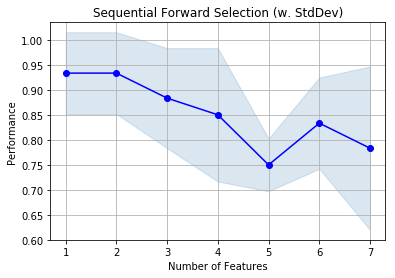

Selected features: (0, 1, 2, 3, 4, 5, 6)


{1: {'feature_idx': (0,),
  'cv_scores': array([0.83333333, 0.83333333, 1.        , 1.        , 1.        ]),
  'avg_score': 0.9333333333333333,
  'feature_names': ('partycount',)},
 2: {'feature_idx': (0, 6),
  'cv_scores': array([0.83333333, 0.83333333, 1.        , 1.        , 1.        ]),
  'avg_score': 0.9333333333333333,
  'feature_names': ('partycount', 'turnover')},
 3: {'feature_idx': (0, 2, 6),
  'cv_scores': array([0.83333333, 0.83333333, 1.        , 0.75      , 1.        ]),
  'avg_score': 0.8833333333333334,
  'feature_names': ('partycount', 'frac', 'turnover')},
 4: {'feature_idx': (0, 1, 2, 6),
  'cv_scores': array([0.83333333, 0.66666667, 1.        , 0.75      , 1.        ]),
  'avg_score': 0.85,
  'feature_names': ('partycount', 'protests', 'frac', 'turnover')},
 5: {'feature_idx': (0, 1, 2, 3, 6),
  'cv_scores': array([0.83333333, 0.66666667, 0.75      , 0.75      , 0.75      ]),
  'avg_score': 0.75,
  'feature_names': ('partycount', 'protests', 'frac', 'rgdp', 'turno

In [30]:
clf_gini1 = DecisionTreeClassifier(criterion="entropy", max_depth=7)
sfs = SFS(clf_gini1,
           k_features=7,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

sfs = sfs.fit(X_train, Y_train)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')


plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


print('Selected features:', sfs.k_feature_idx_)
#clf_gini.fit(X_train, y_train)
sfs.k_feature_names_
sfs.subsets_

In [133]:
# after WWII normal recession was depending...